# Imports

In [16]:
from torch.utils.data import DataLoader, random_split
import torch
from data import PermutationDataset
from model import PermutationModel
from train import train_one_epoch, evaluate_model
import matplotlib.pyplot as plt

# Parameters
This includes parameters for what to train on and predict, and also the hyperparameters for training.

In [17]:
n = 7
label_name = "stat5"
layers = [n*(n-1)//2, n*(n-1)//2+1]

epochs = 2000
train_split, test_split = 0.8, 0.2
learning_rate = 0.001
momentum = 0.9
batch_size = 64

# Initialization
Initialize the data loaders, model, loss function, optimizers.

In [18]:
full_dataset = PermutationDataset(n, label_name)
training_dataset, test_dataset = random_split(full_dataset, [train_split, test_split])
model = PermutationModel(n, layers)
loss_fn = torch.nn.CrossEntropyLoss(full_dataset.class_weights())
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=momentum)
training_loader = DataLoader(training_dataset, batch_size=batch_size, shuffle=True)
losses = []

# Training loop
Train the model for the appropriate number of epochs and then save the model in `models`.

In [19]:
for epoch in range(epochs):
    model.train(True)
    current_loss = train_one_epoch(training_loader, model, loss_fn, optimizer)
    print(f"Epoch {epoch}, Loss {current_loss}")
    losses.append(current_loss)

torch.save(model.state_dict(), f"models/{label_name}_{n}.pt")

Epoch 0, Loss 196.41200184822083
Epoch 1, Loss 196.0399775505066
Epoch 2, Loss 195.44623708724976
Epoch 3, Loss 194.94966864585876
Epoch 4, Loss 194.51577234268188
Epoch 5, Loss 194.09289741516113
Epoch 6, Loss 193.54089307785034
Epoch 7, Loss 193.0403859615326
Epoch 8, Loss 192.57758736610413
Epoch 9, Loss 192.15335035324097
Epoch 10, Loss 191.7468559741974
Epoch 11, Loss 191.09183859825134
Epoch 12, Loss 190.4326946735382
Epoch 13, Loss 189.73412346839905
Epoch 14, Loss 189.24957633018494
Epoch 15, Loss 188.61623001098633
Epoch 16, Loss 187.79017806053162
Epoch 17, Loss 186.80643463134766
Epoch 18, Loss 185.8983895778656
Epoch 19, Loss 184.8845772743225
Epoch 20, Loss 183.89968013763428
Epoch 21, Loss 182.83826160430908
Epoch 22, Loss 181.3687891960144
Epoch 23, Loss 180.27224469184875
Epoch 24, Loss 178.86999893188477
Epoch 25, Loss 177.67974758148193
Epoch 26, Loss 176.22159028053284
Epoch 27, Loss 174.94252967834473
Epoch 28, Loss 172.82802867889404
Epoch 29, Loss 171.795902013778

# Print the loss curve
Visualize the loss curve to ensure that the model is learning correctly. Save the loss curve in `figures/` so that you can refer to them later.

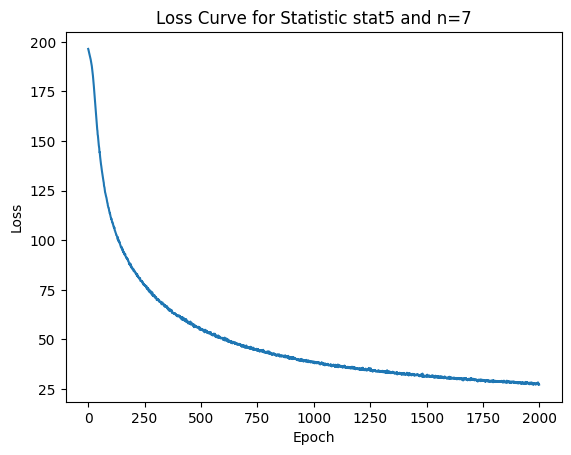

<Figure size 640x480 with 0 Axes>

In [20]:
# Plot loss function
plt.plot(losses)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title(f"Loss Curve for Statistic {label_name} and n={n}")
plt.show()
plt.savefig(f"figures/loss_curve_{n}.png")

# Evaluate the model
Compute the confusion matrix on the train and test dataset and print out the accuracy and plot the confusion matrix.

Accuracy for class 0 = 100.0%
Accuracy for class 1 = 50.0%
Accuracy for class 2 = 100.0%
Accuracy for class 3 = 93.87755102040816%
Accuracy for class 4 = 95.91836734693878%
Accuracy for class 5 = 76.33136094674556%
Accuracy for class 6 = 88.8030888030888%
Accuracy for class 7 = 65.73816155988858%
Accuracy for class 8 = 73.84615384615384%
Accuracy for class 9 = 69.49152542372882%
Accuracy for class 10 = 72.60034904013962%
Accuracy for class 11 = 77.83595113438045%
Accuracy for class 12 = 69.30320150659134%
Accuracy for class 13 = 68.13186813186813%
Accuracy for class 14 = 83.56545961002786%
Accuracy for class 15 = 76.06177606177606%
Accuracy for class 16 = 85.79881656804734%
Accuracy for class 17 = 88.77551020408163%
Accuracy for class 18 = 95.91836734693878%
Accuracy for class 19 = 100.0%
Accuracy for class 20 = 100.0%
Accuracy for class 21 = 100.0%
Overall accuracy = 75.53571428571429%


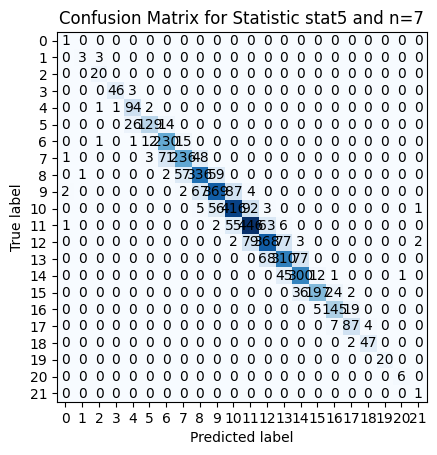

In [21]:
confusion_matrix = evaluate_model(model, full_dataset)
confusion_matrix.print_accuracy()
confusion_matrix.plot(title=f"Confusion Matrix for Statistic {label_name} and n={n}")

# Plot model weights and connections.
Plot the model weights and connections in order to attempt to interpret what the model is learning.

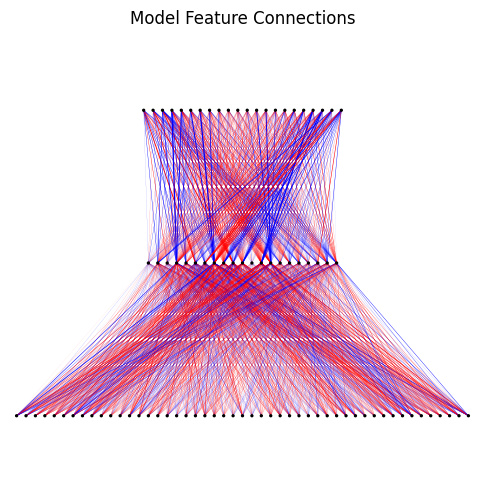

Layer 1


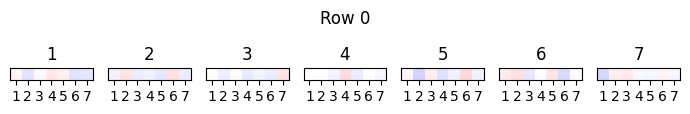

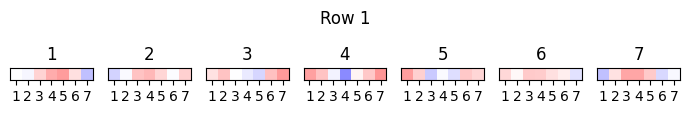

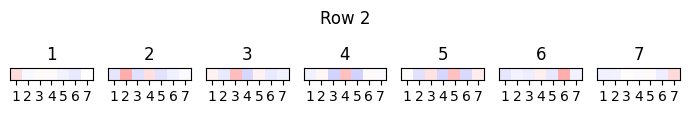

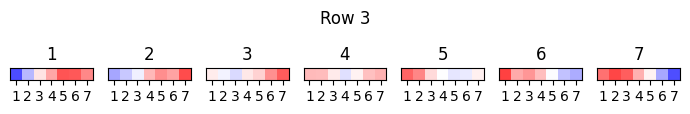

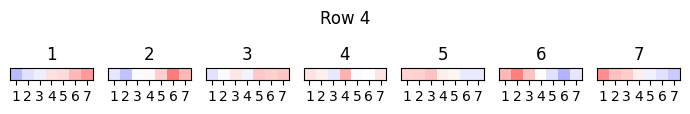

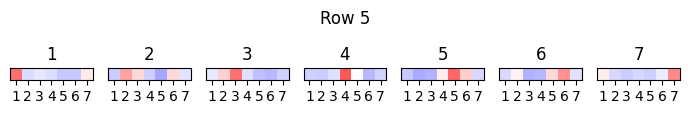

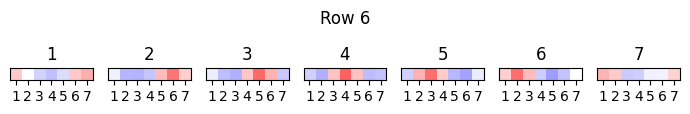

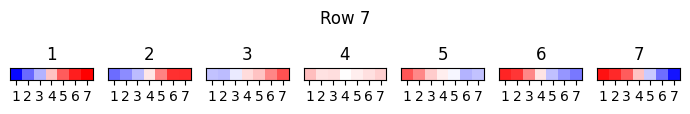

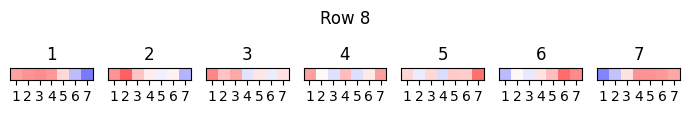

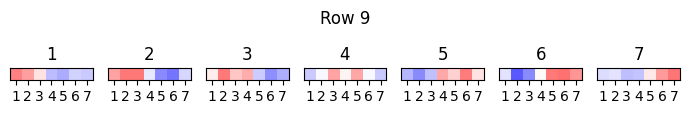

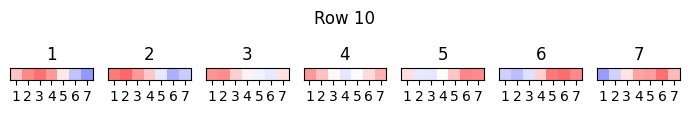

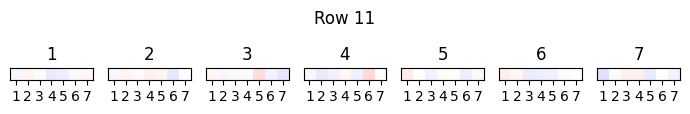

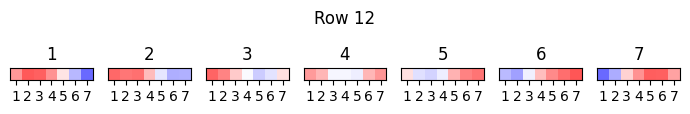

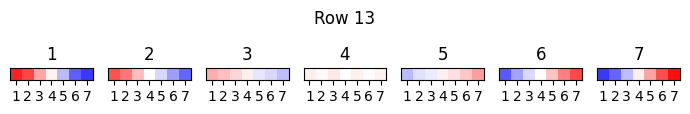

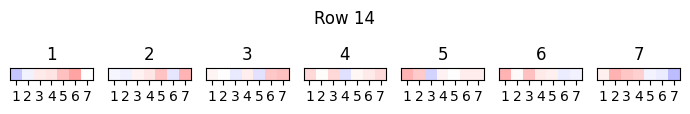

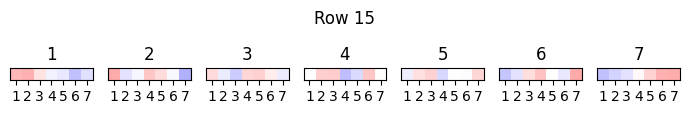

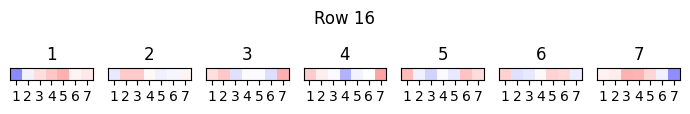

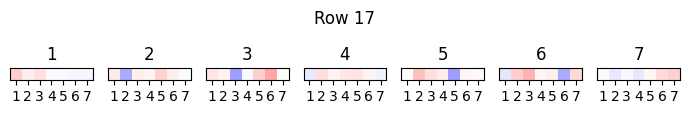

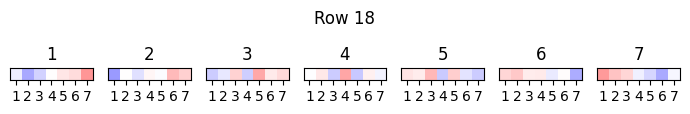

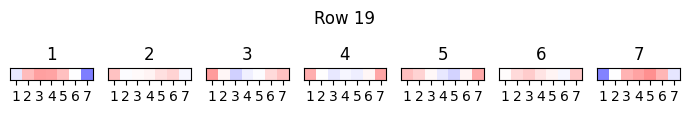

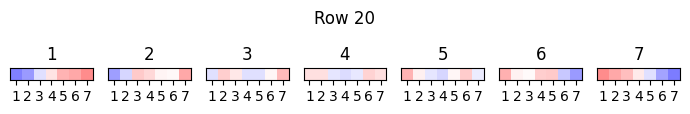

Layer 2


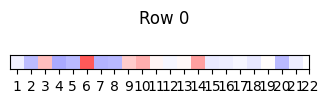

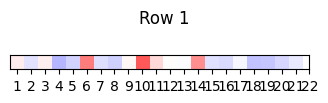

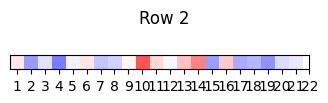

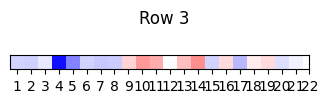

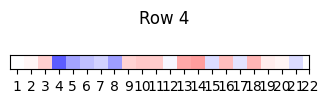

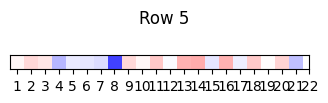

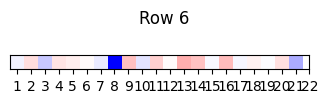

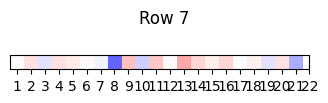

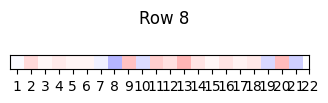

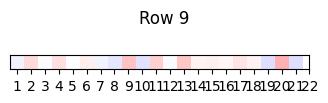

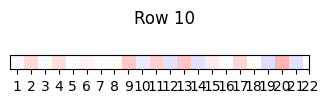

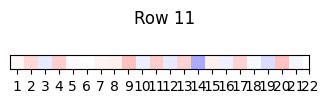

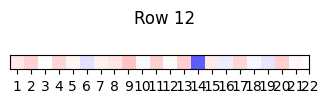

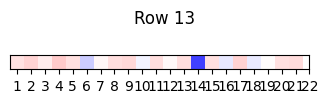

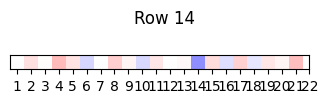

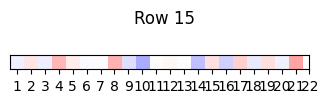

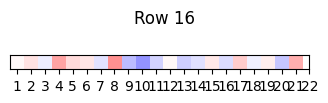

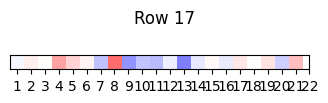

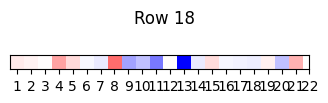

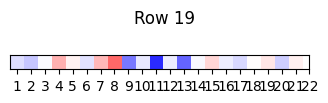

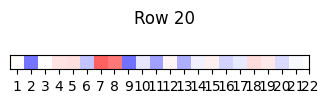

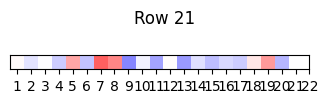

In [22]:
model.plot_connections()

for i in range(len(layers)):
    print(f"Layer {i + 1}")
    for j in range(layers[i]):
        model.plot_heatmap_feature(i, j)